In [1]:
import matplotlib.pyplot as plt
import json
from pathlib import Path

plt.style.use('default')

In [2]:
solo_raw_stats={}
solo_raw_stats[10]={i:json.loads(Path(f'../outputs/solo10/{i}.json').read_text()) for i in range(1,11)}
solo_raw_stats[100]={i:json.loads(Path(f'../outputs/solo100/{i}.json').read_text()) for i in range(1,11)}
solo_raw_stats[1000]={i:json.loads(Path(f'../outputs/solo1000/{i}.json').read_text()) for i in range(1,11)}

In [3]:
solo_stats={}

for size,data in solo_raw_stats.items():
    solo_stats[size]={}

    for i,x in data.items():
        server_requests=x['server']['count']

        # tx_bytes_total=0
        rx_bytes_total=0

        for intf in x['stats']:
            if 's1-' not in intf['ifname']:
                continue

            # tx_bytes_total+=intf['stats64']['tx']['bytes']
            rx_bytes_total+=intf['stats64']['rx']['bytes']
        
        solo_stats[size][i]={}
        # solo_stats[i]['tx']=tx_bytes_total
        solo_stats[size][i]['rx']=rx_bytes_total
        solo_stats[size][i]['server']=server_requests

In [4]:
solo_stats

{10: {1: {'rx': 10695, 'server': 10},
  2: {'rx': 21322, 'server': 20},
  3: {'rx': 31435, 'server': 30},
  4: {'rx': 40638, 'server': 40},
  5: {'rx': 53415, 'server': 50},
  6: {'rx': 64430, 'server': 60},
  7: {'rx': 74479, 'server': 70},
  8: {'rx': 86742, 'server': 80},
  9: {'rx': 96445, 'server': 90},
  10: {'rx': 105876, 'server': 100}},
 100: {1: {'rx': 11671, 'server': 10},
  2: {'rx': 22562, 'server': 20},
  3: {'rx': 33967, 'server': 30},
  4: {'rx': 46862, 'server': 40},
  5: {'rx': 58311, 'server': 50},
  6: {'rx': 69610, 'server': 60},
  7: {'rx': 81499, 'server': 70},
  8: {'rx': 91216, 'server': 80},
  9: {'rx': 105735, 'server': 90},
  10: {'rx': 116256, 'server': 100}},
 1000: {1: {'rx': 21811, 'server': 10},
  2: {'rx': 42682, 'server': 20},
  3: {'rx': 64873, 'server': 30},
  4: {'rx': 85392, 'server': 40},
  5: {'rx': 105851, 'server': 50},
  6: {'rx': 126538, 'server': 60},
  7: {'rx': 148579, 'server': 70},
  8: {'rx': 168312, 'server': 80},
  9: {'rx': 190975, 

In [5]:
rx_values=[solo_stats[i]['rx'] for i in range(1,11)]

plt.plot(rx_values)

KeyError: 1

In [6]:
peer_raw_stats={}
peer_raw_stats[10]={i:json.loads(Path(f'../outputs/peer10/{i}.json').read_text()) for i in range(1,11)}
peer_raw_stats[100]={i:json.loads(Path(f'../outputs/peer100/{i}.json').read_text()) for i in range(1,11)}
peer_raw_stats[1000]={i:json.loads(Path(f'../outputs/peer1000/{i}.json').read_text()) for i in range(1,11)}

In [7]:
peer_stats={}

for size,data in peer_raw_stats.items():
    peer_stats[size]={}

    for i,x in data.items():
        server_requests=x['clients']['h1']['count']

        # tx_bytes_total=0
        rx_bytes_total=0

        for intf in x['stats']:
            if 's1-' not in intf['ifname']:
                continue

            # tx_bytes_total+=intf['stats64']['tx']['bytes']
            rx_bytes_total+=intf['stats64']['rx']['bytes']
        
        peer_stats[size][i]={}
        # solo_stats[i]['tx']=tx_bytes_total
        peer_stats[size][i]['rx']=rx_bytes_total
        peer_stats[size][i]['server']=server_requests

Text(0, 0.5, 'Network traffic generated in bytes')

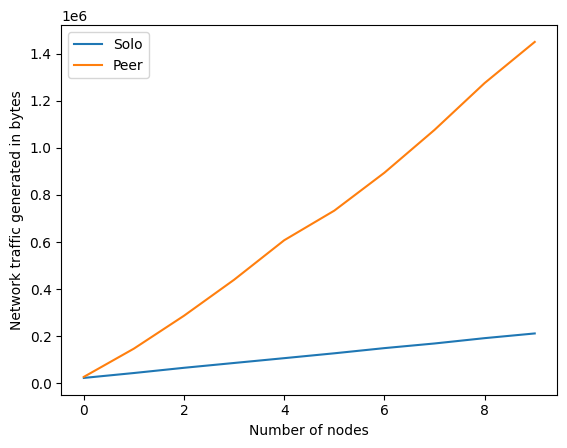

In [8]:
solo_rx_values=[solo_stats[1000][i]['rx'] for i in range(1,11)]
peer_rx_values=[peer_stats[1000][i]['rx'] for i in range(1,11)]

plt.plot(solo_rx_values, label='Solo')
plt.plot(peer_rx_values, label='Peer')
plt.legend()
plt.xlabel('Number of nodes')
plt.ylabel('Network traffic generated in bytes')

Text(0, 0.5, 'Number of HTTP requests')

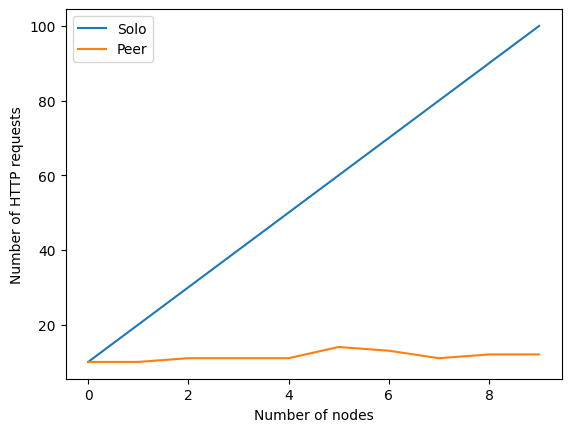

In [9]:
solo_server_values=[solo_stats[1000][i]['server'] for i in range(1,11)]
peer_server_values=[peer_stats[1000][i]['server'] for i in range(1,11)]

plt.plot(solo_server_values, label='Solo')
plt.plot(peer_server_values, label='Peer')
plt.legend()
plt.xlabel('Number of nodes')
plt.ylabel('Number of HTTP requests')